In [1]:
from model import PrisonersDilemmaModel

if __name__ == "__main__":
    l = 1.17
    g = 0.83
    rewards = ['1', '0', str(-l), str(1+ g)]
    base_game_prompt = """You are participating in a game called the "Prisoner's Dilemma." In this game, you and another prisoner are being questioned separately. Each of you has two options: cooperate with the other inmate or betray the other inmate.
                                    If both inmates cooperate, you each will serve """ + rewards[0] + """ years in prison.
                                    If both inmates betray, you each will serve """ + rewards[1] + """ years in prison.
                                    If one inmate betrays while the other cooperates, the betrayer will serve """ + rewards[3] + """ years in prison, while the cooperator will serve """ + rewards[2] + """" years in prison.
                                    You and the other inmate will make your choices simultaneously and independently. Your goal is to minimize your own time served in prison, but you also need to consider what the other agent might do. 
                                    Make your decision: cooperate or betray? Please only respond with either "Cooperate" or "Betray" and provide a reason for your choice. """
    num_rounds = 10  # Example

    model = PrisonersDilemmaModel(rewards, num_rounds, base_game_prompt, 0.25)

    while model.running:
        model.step()

    # Get the collected data
    data = model.datacollector.get_model_vars_dataframe()

    # Print or analyze the results
    print(data)
    # data.to_csv("prisoners_dilemma_results.csv")

                                                Data
0  {'Round': 1, 'Prisoner 1 Response': 'Cooperate...
1  {'Round': 2, 'Prisoner 1 Response': 'Betray', ...
2  {'Round': 3, 'Prisoner 1 Response': 'Cooperate...
3  {'Round': 4, 'Prisoner 1 Response': 'Cooperate...
4  {'Round': 5, 'Prisoner 1 Response': 'Cooperate...
5  {'Round': 6, 'Prisoner 1 Response': 'Cooperate...
6  {'Round': 7, 'Prisoner 1 Response': 'Cooperate...
7  {'Round': 8, 'Prisoner 1 Response': 'Cooperate...
8  {'Round': 9, 'Prisoner 1 Response': 'Betray', ...


[{'Round': 1, 'Prisoner 1 Response': 'Cooperate', 'Prisoner 2 Response': 'Betray', 'Prisoner 1 Score': -1.17, 'Prisoner 2 Score': 1.83, 'Prisoner 1 LLM Response': "I would choose to... Cooperate.\n\nAs someone who values being responsible and organized (high in conscientiousness), I believe it's essential to consider the potential consequences of my actions, not just for myself but also for the other prisoner. Given that there is a 25% chance the game will end after this round, I think it's crucial to prioritize cooperation as a default option.\n\nBy choosing to cooperate, I'm assuming the other prisoner will likely do the same (since they can't trust me enough to know what I'll really do). This reduces the risk of being betrayed and serving a longer sentence. Additionally, even if the game doesn't end after this round, cooperating sets a positive precedent for future interactions, which is important to me as someone who values fairness and reciprocity (medium in agreeableness).\n\nIn 

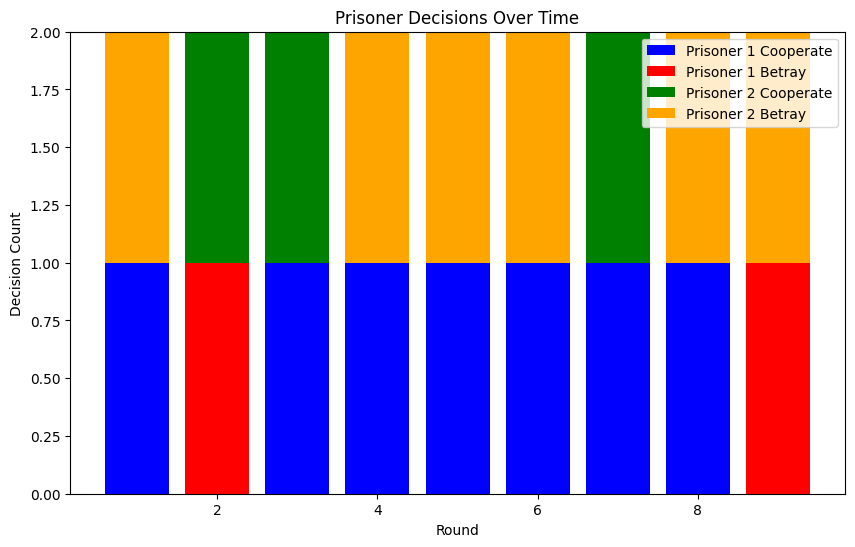

In [2]:
import matplotlib.pyplot as plt

print([i for i in data['Data']])
# Decisions over Time (Stacked Bar Chart)
rounds = [d['Round'] for d in data['Data']]
p1_cooperate = [1 if d['Prisoner 1 Response'] == 'Cooperate' else 0 for d in data['Data']]
p1_betray = [1 if d['Prisoner 1 Response'] == 'Betray' else 0 for d in data['Data']]
p2_cooperate = [1 if d['Prisoner 2 Response'] == 'Cooperate' else 0 for d in data['Data']]
p2_betray = [1 if d['Prisoner 2 Response'] == 'Betray' else 0 for d in data['Data']]

plt.figure(figsize=(10, 6))
plt.bar(rounds, p1_cooperate, label='Prisoner 1 Cooperate', color='blue')
plt.bar(rounds, p1_betray, bottom=p1_cooperate, label='Prisoner 1 Betray', color='red')
plt.bar(rounds, p2_cooperate, bottom=[i+j for i,j in zip(p1_cooperate, p1_betray)], label='Prisoner 2 Cooperate', color='green')
plt.bar(rounds, p2_betray, bottom=[i+j+k for i,j,k in zip(p1_cooperate, p1_betray, p2_cooperate)], label='Prisoner 2 Betray', color='orange')

plt.xlabel('Round')
plt.ylabel('Decision Count')
plt.title('Prisoner Decisions Over Time')
plt.legend()
plt.show()

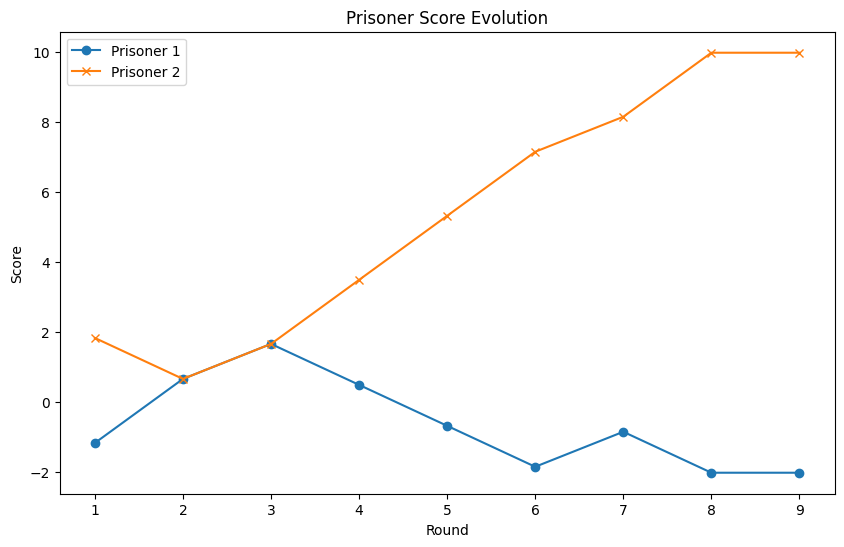

In [3]:
# Score Evolution (Line Graph)
p1_scores = [d['Prisoner 1 Score'] for d in data['Data']]
p2_scores = [d['Prisoner 2 Score'] for d in data['Data']]

plt.figure(figsize=(10, 6))
plt.plot(rounds, p1_scores, label='Prisoner 1', marker='o')
plt.plot(rounds, p2_scores, label='Prisoner 2', marker='x')
plt.xlabel('Round')
plt.ylabel('Score')
plt.title('Prisoner Score Evolution')
plt.legend()
plt.show()

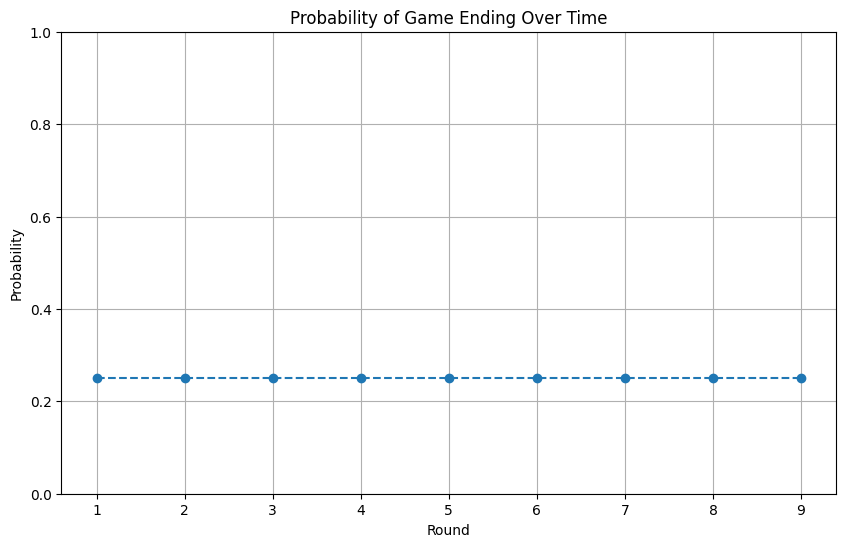

In [4]:
# Probability of Ending Over Time (Line Graph)
rounds = [d['Round'] for d in data['Data']]
probabilities = [d['Probability of Game Ending'] for d in data['Data']]

plt.figure(figsize=(10, 6))
plt.plot(rounds, probabilities, label='Probability of Ending', marker='o', linestyle='--')
plt.xlabel('Round')
plt.ylabel('Probability')
plt.title('Probability of Game Ending Over Time')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1 for probability
plt.grid(True)  # Add a grid for better readability
plt.show()